### Examples of Questions That Primarily Use Google Trends and Redis

In [ ]:
import trends.trends_to_redis as trends_to_redis
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
DOWNLOADS_FOLDER_FP = "/Users/***REMOVED***/Downloads/"
YOUR_USERNAME = "***REMOVED***"

In [3]:
# Artist/Artwork/Movement/Place/School/Occupation to search for
entity_type = "Place"
entity_name = "The Getty"
entity_id = "The_Getty_Museum"

df = trends_to_redis.scrape_entity(entity_name, entity_type, entity_id, DOWNLOADS_FOLDER_FP)

Successfully connected to Redis
Retrieved 53 data points for trends:Place:The_Getty_Museum
2024-03-17: 12
2024-03-24: 14
2024-03-31: 12
2024-04-07: 11
2024-04-14: 11
Data found in Redis


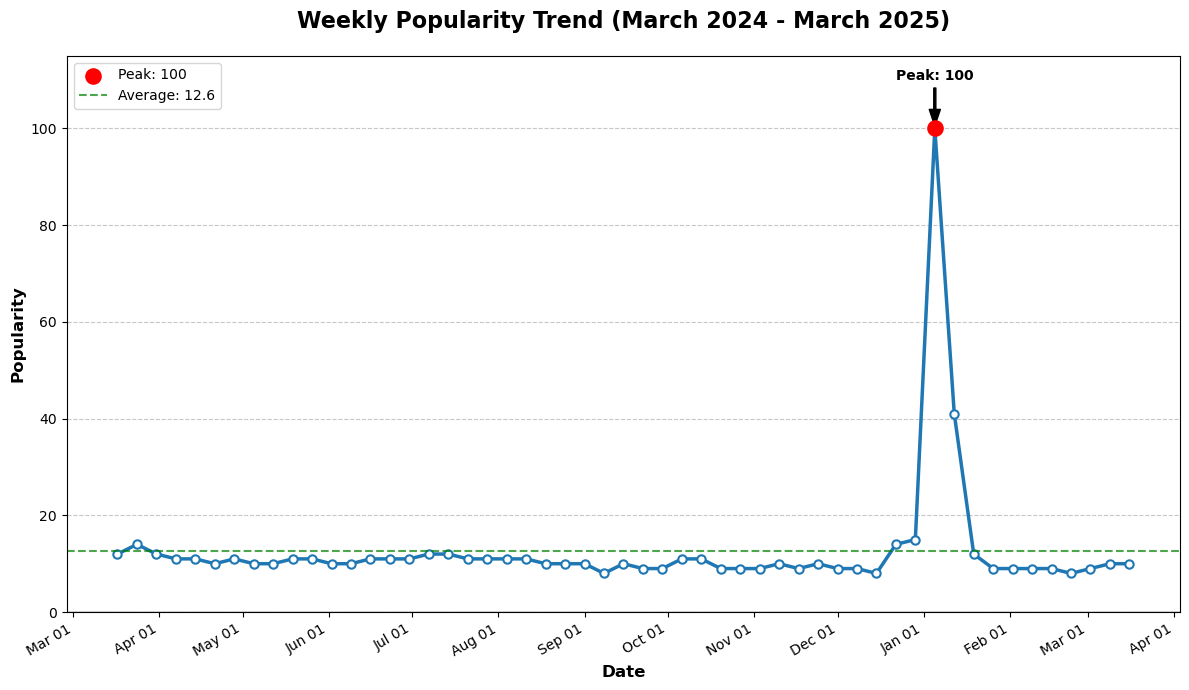

In [12]:
# Convert 'Week' to datetime format
df['Week'] = pd.to_datetime(df['Week'])

# Create the figure and axis with improved size
plt.figure(figsize=(12, 7))

# Create a line graph with improved styling
plt.plot(df['Week'], df['Popularity'], linewidth=2.5, color='#1f77b4', marker='o', 
         markersize=6, markerfacecolor='white', markeredgecolor='#1f77b4', markeredgewidth=1.5)

# Add a horizontal line at y=0
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the peak value
max_popularity_idx = df['Popularity'].idxmax()
max_date = df.loc[max_popularity_idx, 'Week']
max_value = df.loc[max_popularity_idx, 'Popularity']
plt.scatter(max_date, max_value, s=120, color='red', zorder=5, label=f'Peak: {max_value}')

# Configure the date formatting on x-axis
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%b %d')
plt.gca().xaxis.set_major_formatter(date_format)

# Set the x-axis to show a tick every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Add labels and title with improved styling
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Popularity', fontsize=12, fontweight='bold')
plt.title('Weekly Popularity Trend (March 2024 - March 2025)', fontsize=16, fontweight='bold', pad=20)

# Add annotations for key points
plt.annotate(f'Peak: {max_value}', 
             xy=(max_date, max_value), 
             xytext=(max_date, max_value + 10),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             ha='center', fontsize=10, fontweight='bold')

# Calculate average popularity
avg_popularity = df['Popularity'].mean()
plt.axhline(y=avg_popularity, color='green', linestyle='--', alpha=0.7, label=f'Average: {avg_popularity:.1f}')

# Add legend
plt.legend(loc='upper left')

# Add some padding to y-axis for better visualization
y_max = df['Popularity'].max() * 1.15
plt.ylim(0, y_max)

# Tight layout to optimize space usage
plt.tight_layout()

# Save the plot (optional)
plt.savefig('popularity_trend.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [6]:
max_row_index = df['Popularity'].idxmax()
max_row = df.loc[max_row_index]
max_row

Week          2025-01-05 00:00:00
Popularity                    100
Name: 42, dtype: object

In [ ]:
def main():
    DOWNLOADS_FOLDER_FP = "/Users/***REMOVED***/Downloads/"
    YOUR_USERNAME = "***REMOVED***"
    
    # Artist/Artwork/Movement/Style/Location to search for
    entity_type = "Location"
    entity_name = "The Getty"
    entity_id = 1234

    # scrape and insert data
    driver = configure_and_initialize()
    scrape(driver, entity_name)
    df = process_scrape(DOWNLOADS_FOLDER_FP, entity_name)
    insert_trend_data_from_dataframe(df, entity_type, entity_id)

    # retreive data
    df = retreive_from_redis(entity_type, entity_id)

    # test import & retrieval worked w mock query
    n_weeks = 1
    today = datetime.now()
    one_week_ago = today - timedelta(weeks=n_weeks)
    popularity_last_week = np.mean(df[df['Week'] >= one_week_ago].iloc[:,1].values)
    print(popularity_last_week)